In [2]:
import sys 
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
from util_func import *

In [4]:
!pip install requests

In [6]:
!pip install scikit-image

In [11]:
from skimage.segmentation import watershed
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

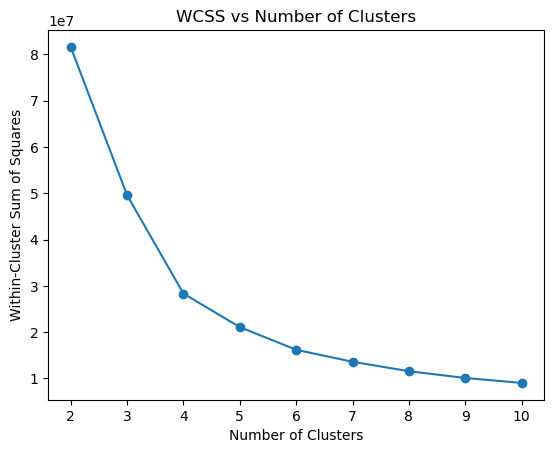

In [14]:
# Loading Image
zebra = cv.imread("images/zebra.jfif")
zebra = cv.cvtColor(zebra, cv.COLOR_BGR2RGB)

# Reshape the image into 2D array
reshape = zebra.reshape(-1, 3)

# Determine the optimal k
wcss = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(reshape)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2, 11), wcss, marker = "o")
plt.title("WCSS vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares")
plt.show()


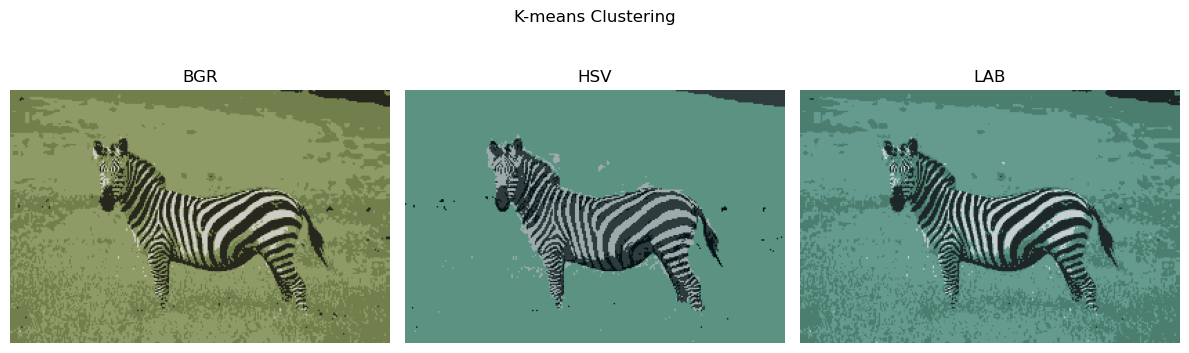

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load Image
zebra = cv.imread("images/zebra.jfif")
zebra = cv.cvtColor(zebra, cv.COLOR_BGR2RGB)

optimal_k = 4

zebra_hsv = cv.cvtColor(zebra, cv.COLOR_BGR2HSV)
zebra_lab = cv.cvtColor(zebra, cv.COLOR_BGR2LAB)

# BGR
kmeans_BGR = KMeans(n_clusters=optimal_k,n_init=10, random_state=0).fit(zebra.reshape(-1, 3))
quant_BGR = kmeans_BGR.cluster_centers_[kmeans_BGR.labels_].reshape(zebra.shape).astype(np.uint8)

# HSV
kmeans_HSV = KMeans(n_clusters=optimal_k, n_init=10, random_state=0).fit(zebra_hsv.reshape(-1, 3))
quant_HSV = kmeans_HSV.cluster_centers_[kmeans_HSV.labels_].reshape(zebra_hsv.shape).astype(np.uint8)
quant_HSV = cv.cvtColor(quant_HSV, cv.COLOR_HSV2RGB)

# LAB
kmeans_LAB = KMeans(n_clusters=optimal_k, n_init=10, random_state=0).fit(zebra_lab.reshape(-1, 3))
quant_LAB = kmeans_LAB.cluster_centers_[kmeans_LAB.labels_].reshape(zebra_lab.shape).astype(np.uint8)
quant_LAB = cv.cvtColor(quant_LAB, cv.COLOR_LAB2RGB)

plt.figure(figsize=(12, 4))
plt.suptitle("K-means Clustering")

plt.subplot(1, 3, 1)
plt.imshow(quant_BGR)
plt.title("BGR")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(quant_HSV)
plt.title("HSV")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(quant_LAB)
plt.title("LAB")
plt.axis("off")

plt.tight_layout()
plt.show()


# comment
#### BGR: Not a good segmentation due to background noise 
#### HSV: Most effective segmentation compared to BGR & LAB
#### LAB: Not a effective segmentation due to background noise